In [59]:
#Georgie Suico
# The purpose of this notebook is to create a map demonstrating industrial land use in Ontario, CA.

In [60]:
#downloading osm data
import osmnx as ox

#importing pandas to work with the data
import pandas as pd

#importing plotly to generate an interactive plot
import plotly.express as px

#importing geopandas to use spatial data
import geopandas as gpd

#setting up contextily for basemaps
import contextily as ctx

#setting up matplotlib
import matplotlib.pyplot as plt

In [61]:
#defining the area of interest with an address
address = 'Ontario International Airport, Vineyard Avenue, Racimo, Ontario, San Bernardino County, California, 91761, United States'

In [62]:
#obtaining building data from OSM for the entire city
osm = ox.geometries_from_address(address,tags={'building':True},dist=5000)

In [63]:
#getting more info on the dataset
#determining hoow many rows/columns
osm.shape
#this dataset has 8264 rows and 133 columns

(3117, 130)

In [64]:
#determining datatype
type(osm)

geopandas.geodataframe.GeoDataFrame

In [65]:
#displaying 15 random rows
osm.sample(10)

addr:state    building  ele gnis:county_name  \
element_type osmid                                                    
way          489673150        NaN         yes  NaN              NaN   
             25451051         NaN   warehouse  NaN              NaN   
node         521362483         CA       house  NaN              NaN   
way          489949397         CA         yes  NaN              NaN   
             972109677        NaN  commercial  NaN              NaN   
             42027111          CA         yes  NaN              NaN   
             906997778        NaN         yes  NaN              NaN   
             489357815        NaN         yes  NaN              NaN   
             991842095        NaN         yes  NaN              NaN   
             737128110        NaN      school  NaN              NaN   

                       gnis:feature_id gnis:reviewed  \
element_type osmid                                     
way          489673150             NaN           NaN   
             25451051              NaN           NaN   
node         521362483             NaN           NaN   
way          489949397             NaN           NaN   
             972109677             NaN           NaN   
             42027111              NaN           NaN   
             906997778             NaN           NaN   
             489357815             NaN           NaN   
             991842095             NaN           NaN   
             737128110             NaN           NaN   

                                                                     name  \
element_type osmid                                                          
way          489673150                                                NaN   
             25451051                                                 NaN   
node         521362483                                                NaN   
way          489949397  La Quinta Inn & Suites by Wyndham Ontario Airport   
             972109677                                                NaN   
             42027111                                                 NaN   
             906997778                                                NaN   
             489357815                                                NaN   
             991842095                                                NaN   
             737128110                                                NaN   

                                           source  \
element_type osmid                                  
way          489673150                        NaN   
             25451051                         NaN   
node         521362483  survey;image;usgs_imagery   
way          489949397                        NaN   
             972109677                        NaN   
             42027111   survey;image;usgs_imagery   
             906997778                        NaN   
             489357815                        NaN   
             991842095                        NaN   
             737128110                        NaN   

                                                                 geometry  \
element_type osmid                                                          
way          489673150  POLYGON ((-117.57751 34.06896, -117.57733 34.0...   
             25451051   POLYGON ((-117.57355 34.05155, -117.57226 34.0...   
node         521362483                        POINT (-117.59680 34.02262)   
way          489949397  POLYGON ((-117.57286 34.07171, -117.57272 34.0...   
             972109677  POLYGON ((-117.56726 34.06490, -117.56702 34.0...   
             42027111   POLYGON ((-117.59422 34.02714, -117.59364 34.0...   
             906997778  POLYGON ((-117.56861 34.06844, -117.56849 34.0...   
             489357815  POLYGON ((-117.57823 34.07527, -117.57824 34.0...   
             991842095  POLYGON ((-117.64292 34.09531, -117.64292 34.0...   
             737128110  POLYGON ((-117.63807 34.02434, -117.63792 34.0...   

          

In [66]:
#exploring column categories in order to find out what columns should be eliminated
osm.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 3117 entries, ('node', 368173617) to ('relation', 14188676)
Data columns (total 130 columns):
 #    Column                          Non-Null Count  Dtype   
---   ------                          --------------  -----   
 0    addr:state                      333 non-null    object  
 1    building                        3117 non-null   object  
 2    ele                             7 non-null      object  
 3    gnis:county_name                3 non-null      object  
 4    gnis:feature_id                 8 non-null      object  
 5    gnis:reviewed                   3 non-null      object  
 6    name                            279 non-null    object  
 7    source                          432 non-null    object  
 8    geometry                        3117 non-null   geometry
 9    addr:city                       348 non-null    object  
 10   addr:housenumber                360 non-null    object  
 11   addr:street            

In [67]:
#subsetting the data and defining which columns to keep
ctk=['geometry','building']
osm=osm[ctk]
osm.head(10)

geometry building
element_type osmid                                          
node         368173617  POINT (-117.65043 34.09696)      yes
             479791356  POINT (-117.54560 34.08149)      yes
             479791359  POINT (-117.54563 34.08115)      yes
             479791362  POINT (-117.54570 34.08083)      yes
             518277168  POINT (-117.57604 34.08489)      yes
             518277169  POINT (-117.57537 34.08804)      yes
             518277174  POINT (-117.57559 34.09250)      yes
             518277175  POINT (-117.57559 34.09311)      yes
             518277177  POINT (-117.57559 34.09358)      yes
             518277178  POINT (-117.57560 34.09416)      yes

In [68]:
#removing unspecified building types using .loc
osm.loc[osm['building']=='yes','building']='unspecified'

In [69]:
#making a dataframe/creating a building type chart
osm_build_count=osm.value_counts(['building']).reset_index(name="count")
osm_build_count

,building,count
0,unspecified,1552
1,house,573
2,commercial,298
3,industrial,283
4,retail,72
5,apartments,66
6,residential,59
7,school,56
8,roof,45
9,warehouse,37


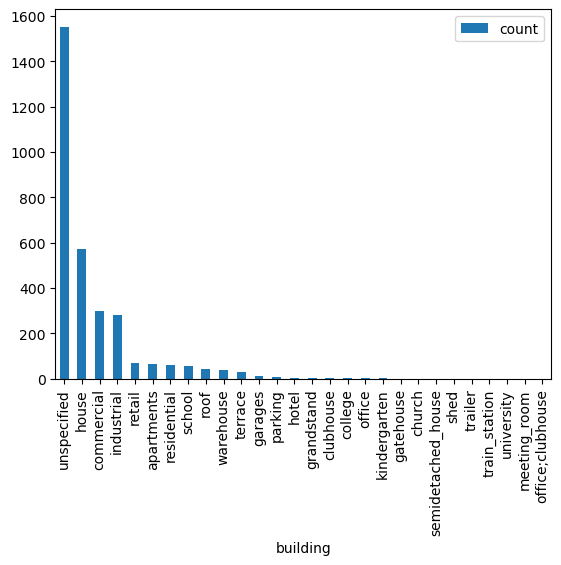

In [70]:
#Visualizing the data through a bar chart
osm_build_count.plot.bar(x='building');

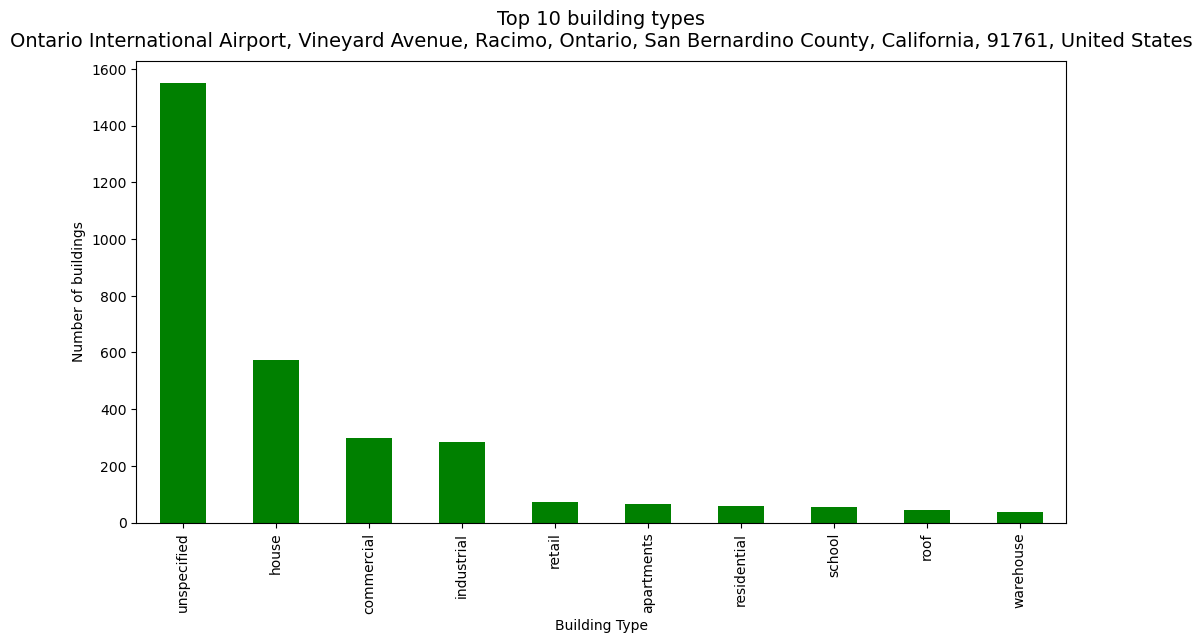

In [71]:
#creating another, more readable chart
fig, ax = plt.subplots(figsize=(12,6))

osm_build_count[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='green'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



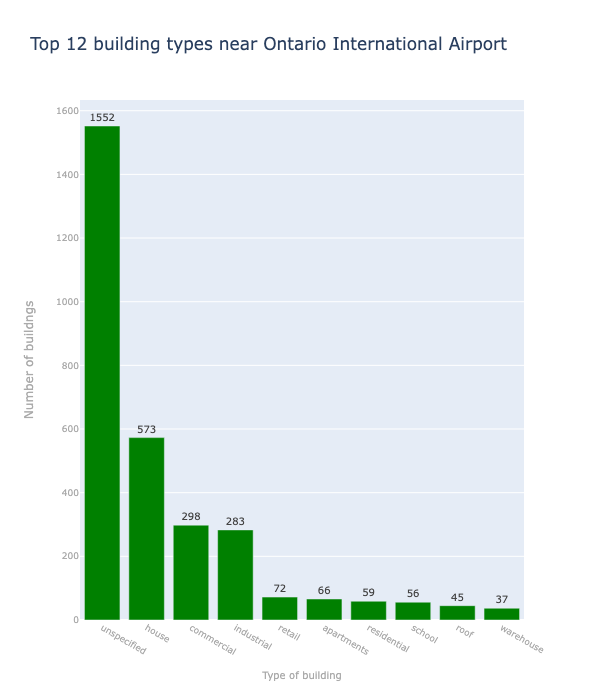

In [77]:
# creating a plotly graph
fig = px.bar(osm_build_count.head(10),
        x='building',
        y='count',
        title="Top 12 building types near Ontario International Airport", 
        text_auto = True,
        height=700,
        width=900,
        color_discrete_sequence =['green']*len(osm_build_count),
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# labeling the bar
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# labeling the axes
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<AxesSubplot: >

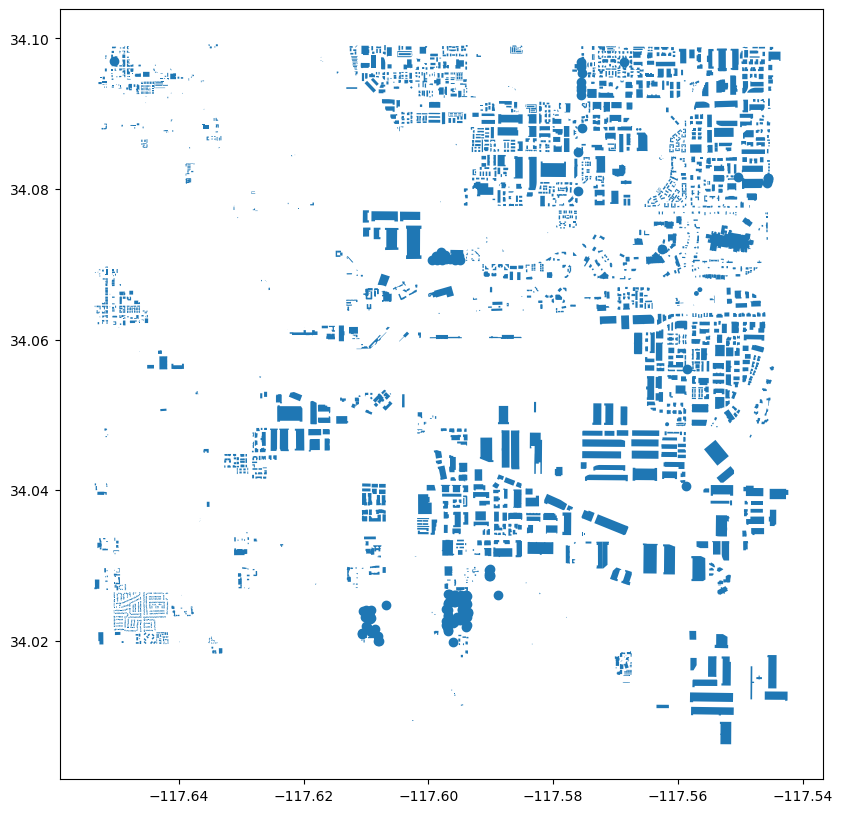

In [72]:
osm.plot(figsize=(10,10))

<AxesSubplot: >

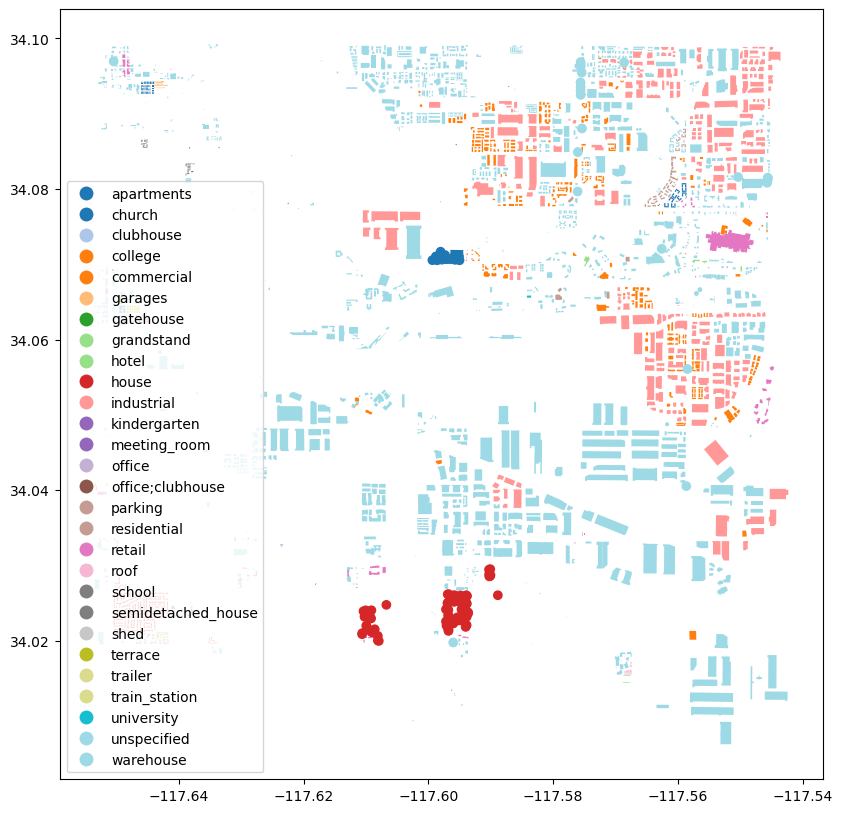

In [73]:
#trying to color code the buildings
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [78]:
##trying to create a morphology map - first by determining map bounds
#obtain the minimum and maximum for longitude and latitude
minx=osm.total_bounds[0]
miny=osm.total_bounds[1]
maxx=osm.total_bounds[2]
maxy=osm.total_bounds[3]

In [80]:
#putting all the building types in a list
buildingtypes=osm['building'].unique().tolist()
buildingtypes

['unspecified',
 'house',
 'apartments',
 'warehouse',
 'clubhouse',
 'trailer',
 'commercial',
 'university',
 'gatehouse',
 'office;clubhouse',
 'residential',
 'office',
 'meeting_room',
 'industrial',
 'retail',
 'roof',
 'hotel',
 'shed',
 'parking',
 'college',
 'train_station',
 'school',
 'terrace',
 'semidetached_house',
 'kindergarten',
 'church',
 'garages',
 'grandstand']

In [ ]:
#attempting to loop through each building type
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(5,5))
    
    #creating the map plot
    osm.plot(ax=ax, 
             color='green')
    
    osm[osm['building']==type].plot(ax=ax,
            color='blue')
    
    #setting map extent
    ax.set_xlim((minx,maxx))
    ax.set_ylim((minx,maxy))
    
    #adding title
    number_of_build=len(osm[osm['building']==type])
    ax.set_title(str(number_of_build)+' '+type+'buildings')
    #removing axis
    ax.axis('off');

In [108]:
##trying to see specific building type
features = ox.geometries_from_address(osm,tags=
{'building':
['industrial','warehouse','house','residential']})

osm.plot